In [ ]:
!nvidia-smi

Tue Jan 27 12:42:31 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import yaml
import numpy as np


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!unzip indian-number-plate-dataset.zip

Archive:  indian-number-plate-dataset.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/video10_1070_jpg.rf.dc513b23eab6cab4a6ca1dac8894b27b.jpg  
 extracting: test/images/video10_1250_jpg.rf.78e44f9bb4e03b14f081b3e84313caf8.jpg  
 extracting: test/images/video10_1270_jpg.rf.35ce44d5ae46b8f6c9b3fbc37f6e4e1e.jpg  
 extracting: test/images/video10_140_jpg.rf.018de137aada26915243a26a1f369bc6.jpg  
 extracting: test/images/video10_1420_jpg.rf.8e2f6d49ac9287a7a68487906aca7df9.jpg  
 extracting: test/images/video10_1710_jpg.rf.6b86a52b12a313a9c97cb8ead09b7a5d.jpg  
 extracting: test/images/video10_850_jpg.rf.e7ef42577bf443eba824e2282c7829b7.jpg  
 extracting: test/images/video11_1030_jpg.rf.347f2bdbffa861592a4bd3476cdfbb2a.jpg  
 extracting: test/images/video11_1110_jpg.rf.d7b4a29a59ab20d3a0fec911659f19c8.jpg  
 extracting: test/images/video11_1120_jpg.rf.

In [ ]:
train_imgs = len(os.listdir("train/images"))
val_imgs = len(os.listdir("valid/images"))
test_imgs = len(os.listdir("test/images"))

print("Train:", train_imgs)
print("Val  :", val_imgs)
print("Test :", test_imgs)

Train: 1215
Val  : 78
Test : 59


In [ ]:
with open("data.yaml") as f:
    data = yaml.safe_load(f)

print(data)


{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 1, 'names': ['number_plate'], 'roboflow': {'workspace': 'yolox-qcftu', 'project': 'indian-number-plate-keeo5', 'version': 2, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/yolox-qcftu/indian-number-plate-keeo5/dataset/2'}}


(np.float64(-0.5), np.float64(1544.5), np.float64(1079.5), np.float64(-0.5))

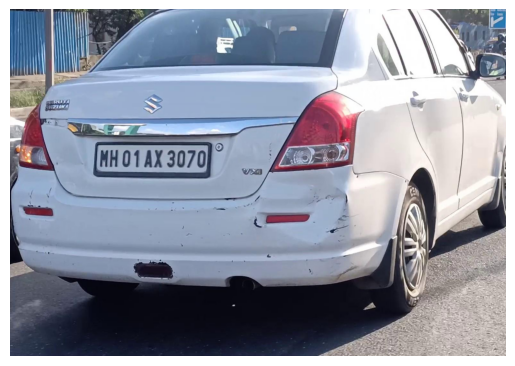

In [ ]:
img_name = os.listdir("train/images")[0]

img = cv2.imread(f"train/images/{img_name}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")


In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
model.train(
    data="data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    name="plate_ml_model"
)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=plate_ml_model, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0e68d27da0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
metrics = model.val()

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2506.4±1223.9 MB/s, size: 107.5 KB)
val: Scanning /content/valid/labels.cache... 78 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 78/78 40.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 5/5 2.1it/s 2.4s
                   all         78         78      0.986      0.987      0.985      0.736
Speed: 4.2ms preprocess, 8.8ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /content/runs/detect/val


In [ ]:
model.val(data="data.yaml", split="test")

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2366.2±730.2 MB/s, size: 125.7 KB)
val: Scanning /content/test/labels... 59 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 59/59 2.6Kit/s 0.0s
val: New cache created: /content/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.8it/s 2.3s
                   all         59         59      0.999          1      0.995      0.723
Speed: 7.3ms preprocess, 12.7ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e0f817fb650>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

(np.float64(-0.5), np.float64(2999.5), np.float64(2249.5), np.float64(-0.5))

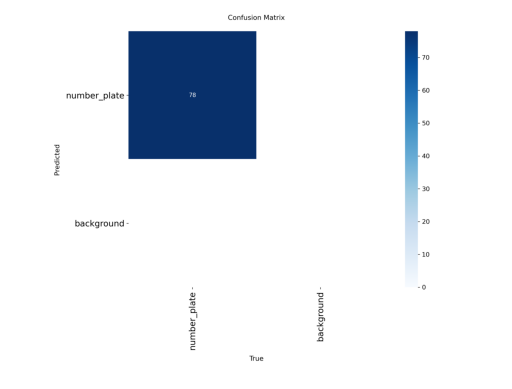

In [ ]:
from PIL import Image

cm = Image.open("runs/detect/plate_ml_model/confusion_matrix.png")
plt.imshow(cm)
plt.axis("off")

(np.float64(-0.5), np.float64(2249.5), np.float64(1499.5), np.float64(-0.5))

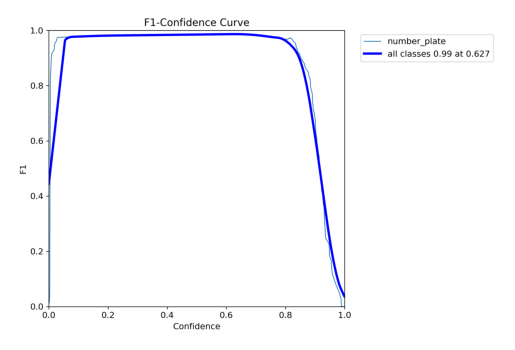

In [ ]:
pr = Image.open("/content/runs/detect/plate_ml_model/BoxF1_curve.png")
plt.imshow(pr)
plt.axis("off")


(np.float64(-0.5), np.float64(2249.5), np.float64(1499.5), np.float64(-0.5))

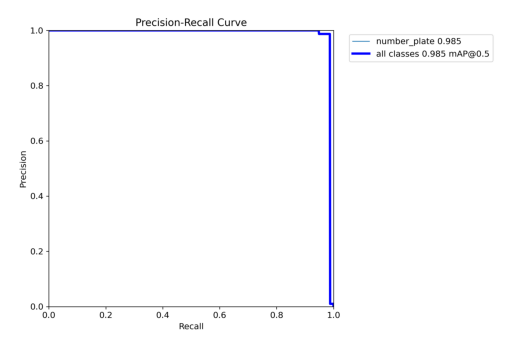

In [ ]:
f1 = Image.open("/content/runs/detect/plate_ml_model/BoxPR_curve.png")
plt.imshow(f1)
plt.axis("off")

In [ ]:
model = YOLO("runs/detect/plate_ml_model/weights/best.pt")


In [ ]:
test_folder = "test/images"   # adjust if path differs

test_images = os.listdir(test_folder)
print("Total test images:", len(test_images))


Total test images: 59


In [ ]:
def predict_and_show(img_path):

    # Load original image
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Predict
    results = model(img_path, conf=0.65)

    # Get prediction image (YOLO draws boxes automatically)
    predicted_img = results[0].plot()
    predicted_img = cv2.cvtColor(predicted_img, cv2.COLOR_BGR2RGB)

    # Show side by side
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title("BEFORE (Original)")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(predicted_img)
    plt.title("AFTER (Prediction)")
    plt.axis("off")

    plt.show()


Predicting: video6_1130_jpg.rf.d439d4a796cb7409c472de5dc5aee4fc.jpg

image 1/1 /content/test/images/video6_1130_jpg.rf.d439d4a796cb7409c472de5dc5aee4fc.jpg: 480x640 1 number_plate, 56.4ms
Speed: 4.2ms preprocess, 56.4ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)


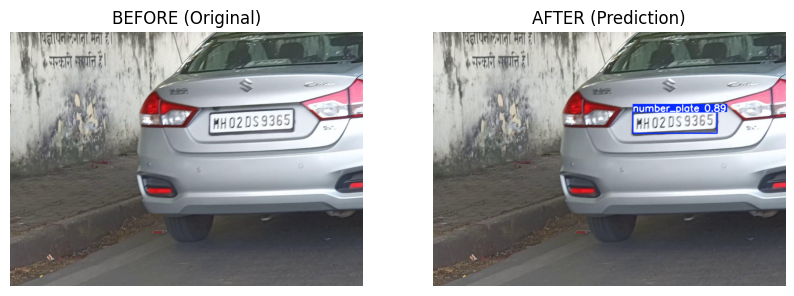

Predicting: video3_1800_jpg.rf.2a3fe8610901c20a9e50e8fc1dc923b7.jpg

image 1/1 /content/test/images/video3_1800_jpg.rf.2a3fe8610901c20a9e50e8fc1dc923b7.jpg: 640x384 1 number_plate, 65.2ms
Speed: 2.9ms preprocess, 65.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)


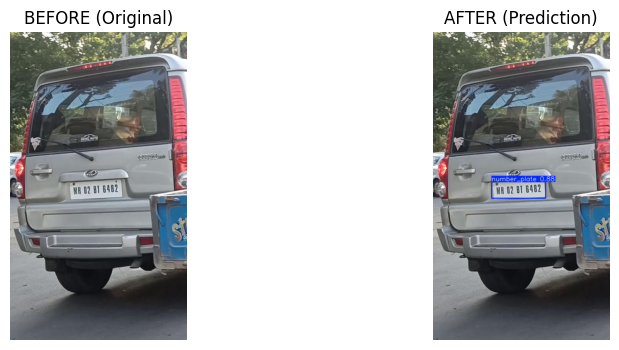

Predicting: video11_2210_jpg.rf.b47b7d200268d4d44b63898509e57e1e.jpg

image 1/1 /content/test/images/video11_2210_jpg.rf.b47b7d200268d4d44b63898509e57e1e.jpg: 352x640 1 number_plate, 76.3ms
Speed: 4.2ms preprocess, 76.3ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)


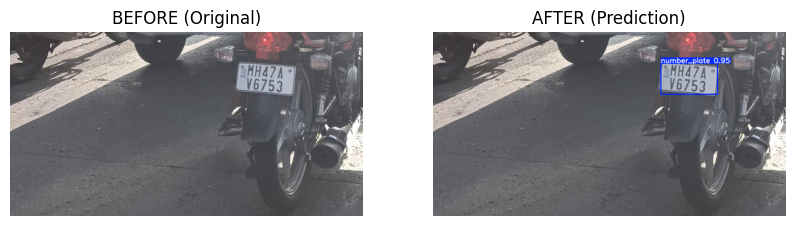

Predicting: video6_1000_jpg.rf.eac904f11d051b60d6483ccf7a79035d.jpg

image 1/1 /content/test/images/video6_1000_jpg.rf.eac904f11d051b60d6483ccf7a79035d.jpg: 384x640 1 number_plate, 38.3ms
Speed: 3.5ms preprocess, 38.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


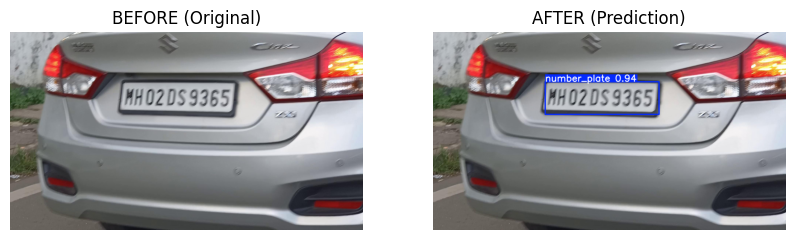

Predicting: video9_40_jpg.rf.3af772de2b4632fdce2f9c5b80e4154e.jpg

image 1/1 /content/test/images/video9_40_jpg.rf.3af772de2b4632fdce2f9c5b80e4154e.jpg: 384x640 1 number_plate, 9.3ms
Speed: 3.1ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


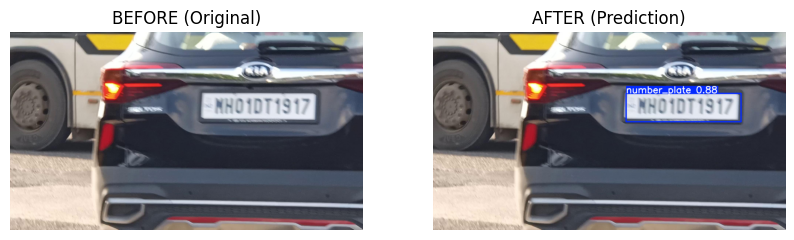

In [ ]:
for i in range(5):   # show first 5 test images

    img_name = test_images[i]
    img_path = os.path.join(test_folder, img_name)

    print("Predicting:", img_name)
    predict_and_show(img_path)
